In [ ]:
Informtion Processing Wet 2

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

(0.951, 'percentage of time the interval contained the true CDF')


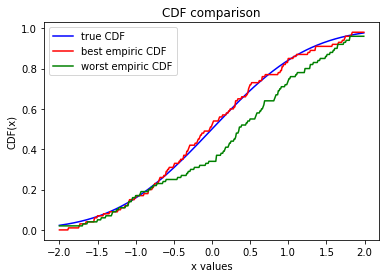

In [27]:
# Question 1: 

# A function which creates a range of x values, in order to compare the true and empiric CDF
def create_x_range(x,y,jump):
    frange = []
    current_x = x
    while current_x < y :
        frange += [current_x]
        current_x += jump
    return frange

# The true normal CDF
from scipy.stats import norm
def cal_CDF(x_values):
    CDF = []
    for x in x_values:
        CDF.append(norm.cdf(x))
    return CDF

mu, sigma = 0, 1 # mean and standard deviation
num_samples = 100

num_CDF_outside_band = 0  # The number of times that the true CDF is outside the confidence band
# The best and worst empirical CDF in matter of max(empiric_CDF(x) - true_CDF(x)):
best_empirical_CDF = [] 
global_best_CDF_diff = 0
worst_empirical_CDF = []
global_worst_CDF_diff = 0

# calculate true CDF
x_values = create_x_range(-2,2,0.01)
true_CDF = cal_CDF(x_values) 

for j in range(1,1000):
    # generate 100 samples
    samples = np.random.normal(mu, sigma, num_samples)
    
    # calculate confidence band
    sample_sigma = np.var(samples, ddof=1)
    alpha = 0.05
    confidence_interval = math.sqrt((math.log(2/alpha))/float(2*num_samples))
    
    # calculate empirical CDF
    empirical_CDF = []
    empiric_val = 0
    i = 0
    for x in x_values:
        empirical_CDF.append(0)
        for sample in samples:
            if (sample < x):
                empirical_CDF[i] += 1
        empirical_CDF[i] = empirical_CDF[i] / float(num_samples)
        i += 1
    
    # calculate whether the true CDF is inside the cofidence band, and the best and worst empirical_CDF
    max_CDF_diff = 0
    i = 0
    for x in x_values:
        diff = abs(empirical_CDF[i] - true_CDF[i])
        max_CDF_diff = max(max_CDF_diff, diff)
        i += 1
    
    if (max_CDF_diff > confidence_interval):
        num_CDF_outside_band += 1
    
    if (max_CDF_diff > global_worst_CDF_diff):
        global_worst_CDF_diff = max_CDF_diff
        worst_empirical_CDF = empirical_CDF[:]
        
    if ((max_CDF_diff < global_best_CDF_diff) or (global_best_CDF_diff == 0)):
        global_best_CDF_diff = max_CDF_diff
        best_empirical_CDF = empirical_CDF[:]

# print results:
# precentage of CDF outside confidence band:
CDF_outside_band_percentage = num_CDF_outside_band / float(1000)
print ((1-CDF_outside_band_percentage), "percentage of time the interval contained the true CDF")

# plot the true, best and worst CDF:
true, = plt.plot(x_values, true_CDF, 'b', label="true CDF")
best, = plt.plot(x_values, best_empirical_CDF, 'r', label="best empiric CDF")
worst, = plt.plot(x_values, worst_empirical_CDF, 'g', label="worst empiric CDF")
plt.legend(loc='upper left')
plt.ylabel('CDF(x)')
plt.xlabel('x values')
plt.title("CDF comparison")
plt.show()
    
    

In [ ]:
# Question 2: 

import pandas as pd

samsungData = pd.read_csv('C:\Technion\Semester 6\Inforamtion_Processing\Tutorial_1\samsungData.csv')
samsungData = samsungData.drop(['Unnamed: 0'], axis=1)


# Question 3:
num_examples, num_features = samsungData.shape

#calculate the correlation between each pair of features:
corr_df = samsungData.corr()
#corr_df.to_csv('C:\Technion\Semester 6\Inforamtion_Processing\Wet_2\corr_df.csv')

# present the data as heatmap:
#plt.pcolor(corr_df)
#plt.yticks(np.arange(0.5, len(corr_df.index), 1), corr_df.index)
#plt.xticks(np.arange(0.5, len(corr_df.columns), 1), corr_df.columns)
#plt.show()


# Question 4:
# find the two most correlated features:
# sort the correlation dataframe, and exclude cells which represent the same feature (which means: variance and not correlation)
#corr_zero_var = corr_df
labels = list(corr_df.index)
for i in range(0, (num_features-1)):
    corr_df.set_value(labels[i],labels[i],0)
sorted_corr_df = corr_df.abs().unstack().sort_values()

print("The two most correlated features are: ", (list(sorted_corr_df.index))[-1])
print "One can notice that the most correlated features are those which measure the same aspect"


# Question 5:
# group the features by class:
corr_by_class = samsungData.groupby('activity').corr()
# calculate the correlation between each pair of features per class:
#corr_by_class.to_csv('C:\Technion\Semester 6\Inforamtion_Processing\Wet_2\corr_by_class.csv')

# present the data as heatmap:
plt.pcolor(corr_by_class)
plt.yticks(np.arange(0.5, len(corr_by_class.index), 1), corr_by_class.index)
plt.xticks(np.arange(0.5, len(corr_by_class.columns), 1), corr_by_class.columns)
plt.show()
